# Queen Street Fitness Text Classification


## Business Case
Queen Street Fitness is a gym located here in Kingston, Ontario, operating in the fitness industry. They provide fitness equipment, classes, and personal training sessions to individuals and groups. The business model is B2C and their target customers are people of all ages and fitnes levels who are looking to improve their overall health and fitness. The primary product of Queen Street Fitness is fitness equipment and services that help customers achieve their fitness goals. The gym provides access to a variety of equipment, including cardio machines, free weights, and resistence training equipment. Queen Street Fitness falls into the small business category, as it is a relatively small business with a single location. It employs a small team of experienced fitness trainers and support staff, it is safe to assume the number of staff working at the gym is lower than 50. They have a pretty small online presence with approximately four thousand followers across all socials. The business has a website that provides information on the gym's services, pricing, and schedules.

## Product Description
The opportunity I am providing to Queen Street Fitness is to provide a text classification algorithm for the gym to analyze customer feedback and determine the emotions associated with them. This algorithm will help the gym improve its services and identify the areas where change is needed. It will also provide the gym with insights on some of the feedback competitors are facing and see what other gyms do right and wrong to ensure Queen Street Fitness is the best option. In order to do this, I will be analyzing a Kaggle dataset, which takes tweets and label them by emotion. This will allow the gym to quickly and easily categorize customer feedback into positive, neutral, and negative emotions. This will let the gym understand its customer needs better and improve its services to meet the needs of current and future customers. The beneficiaries of this algorithm are the customers of Queen Street Fitness and the gym itself. Customers will benefit from the improvement in services and the gym will benefit from the increase in customers, customer satisfaction, and customer loyalty. The solution will be very easy to use and will allow the gym to categorize the feedback from their gym and other gyms. They will use the product by inputting customer feedback into the algorithm, which will then categorize the feedback as neutral, worry, happiness, fun, enthusiastic, hate, and more! 

## Business Value
Investing in the text classification algorithm has the potential to bring long-term value to Queen Street fitness. By using the solution to categorize feedback, the gym can make data-driven decisions to improve its services and customer experience. This can result in a higher customer retention rate and increased revenue for the gym. In order to quantify the value of the algorithm, I recommend the gym set two target KPI's. The first being the time it takes to respond to customer feedback... by using the algorithm to categorize feedback by emotion, the gym can quickly idetnify areas that need improvement and respond to customers in a timely manner. Setting a target time to respond to customer feedback can help the gym track progress toward improving customer satisfaction and loyalty. The other KPI is customer retention rate... when using the algorithm to address issues in a timely manner, the odds are they will have a higher custoemr retention rate. This can be measured by tracking the number of customers who renew their memberships or continue to use the gym's services.

In addition to the text classification algorithm I am offering, other activities may be required to fully achieve the business goals of the gym. One of these being marketing. by promoting the gym's improved services and customer experience, the gym can attract new customers and keep existing ones. Another activity is data collection. The gym will need to collect the feedback from customers to input it in the algorithm. Another activity Queen Street Fitness might need to factor is employee training. The gym may need to invest in training so they can confidently trust that staff is equipped to handle customer satisfaction and respond appropriately. Examples of training could include active listening, conflict resolution, or customer service best practices.

## Data

## Data Description
The data was collected from Kaggle titled "Emotion Detection from Text" and can be found [here](https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text)
The dataset contains 3 columns, these columns are:

* tweet_id - unique id given to each tweet
* sentiment - the labeled emotion that has been determined from the given tweet
* content - the tweet

The dataset contains nearly 40,000 tweets that have all been labeled and analyzed by humans with one of 13 emotions. The dataset was originally collected for research with the intended purpose of providing a resource for researchers and developers to train and test text classification models for emotion detection. In alphabetical order, the different emotions are:

* Anger
* Boredom
* Empty
* Enthusiasm
* Fun
* Happiness
* Hate
* Love
* Neutral
* Relief
* Sadness
* Surprise
* Worry

For the Proof of Concept for Queen Street Fitness, the dataset will be used to train a linear learner model for text classification. Although the dataset contains tweets rather than direct customer feedback, the same techniques can be applied to analyze customer feedback for emotion. Queen Street Fitness might choose to use their own data specific to the gym industry and its customers for classifying emotions, but the data I collected should do the job for determining the emotion of a review as tweets and customer reviews are very similar in the way the user expresses themself. If the gym believes the best way to go about the live solution is collecting the most accurate data on gym reviews, the data should be collected through a bunch of different channels such as social media, surveys, and/or customer service interactions. The data should then be as relevant as possible to the gym industry and its services along with reflecting the specific needs and preferences of Queen Street Fitness customers.

## Data Exploration
### Need to prepare the environment
#### Upgrade the version of boto3 and sagemaker, install wordcloud 

In [106]:
%pip install -qU --upgrade boto3
%pip install -qU --upgrade sagemaker
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Note: you may need to restart the kernel to use updated packages.


#### Install all the necessary packages I'll need

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
import sagemaker
from sagemaker.estimator import Estimator 
from sagemaker import get_execution_role
import boto3
from sagemaker import image_uris
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import time
from time import gmtime, strftime
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import re
from sklearn.preprocessing import OrdinalEncoder

# Set column width to 200 to make the text easier to read
pd.options.display.max_colwidth = 200

### Download the NTLK Trained Models

In [108]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Download the NTLK Stopwords list

In [109]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Download the NTLK corpus reader

In [110]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Setup Environment Variables

In [111]:
role = get_execution_role()
sess = sagemaker.Session() 
region = sess.boto_session.region_name
bucket = sess.default_bucket()
print("The role is ", role)
print("The session is ", sess)
print("The region is ", region)
print("The bucket is ", bucket)

The role is  arn:aws:iam::006789315315:role/LabRole
The session is  <sagemaker.session.Session object at 0x7f2076c3c730>
The region is  us-east-1
The bucket is  sagemaker-us-east-1-006789315315


### Download Dataset to Jupyter Notebook

In [112]:
# Import data into pandas DataFrame

tweet_emotions = pd.read_csv("tweet_emotions.csv")

In [113]:
# Look at the data

tweet_emotions

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin on your call...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,"Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!"
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!


### Remove Junk Data
Here we don't care about the tweet_id because there is no use for it in our solution

In [114]:
del tweet_emotions["tweet_id"]

In [115]:
tweet_emotions

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,sadness,Layin n bed with a headache ughhhh...waitin on your call...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,"Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!"
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!


### Check for any missing values

In [116]:
tweet_emotions.isnull().sum()

sentiment    0
content      0
dtype: int64

### Get some info on the data

In [117]:
tweet_emotions.describe()

,sentiment,content
count,40000,40000
unique,13,39827
top,neutral,I just received a mothers day card from my lovely daughter wishing my a happy mothers day http://tr.im/kWK9
freq,8638,14


### Use the group by to see how many records there are for each label

In [118]:
tweet_emotions.groupby("sentiment").describe()

content         \
             count unique   
sentiment                   
anger          110    110   
boredom        179    179   
empty          827    827   
enthusiasm     759    759   
fun           1776   1776   
happiness     5209   5194   
hate          1323   1323   
love          3842   3801   
neutral       8638   8617   
relief        1526   1524   
sadness       5165   5160   
surprise      2187   2187   
worry         8459   8452   

                                                                                                                                       \
                                                                                                                                  top   
sentiment                                                                                                                               
anger                                                                                                           fuckin'm transtelecom   
boredom                                                                                                                  i'm so tired   
empty                                    @tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[   
enthusiasm                                                                                       wants to hang out with friends SOON!   
fun         Wondering why I'm awake at 7am,writing a new song,plotting my evil secret plots muahahaha...oh damn it,not secret anymore   
happiness                                 FREE UNLIMITED RINGTONES!!! - http://tinyurl.com/freeringring - USA ONLY - Awesome 4 iphone   
hate                                             It is so annoying when she starts typing on her computer in the middle of the night!   
love                     I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9   
neutral                                   FREE UNLIMITED RINGTONES!!! - http://tinyurl.com/freeringring - USA ONLY - Awesome 4 iphone   
relief                http://snipurl.com/hq0n1 Just printed my mom an Amazon gift card  for Happy Mothers Day talk about last minute.   
sadness                                                                                                                  at home sick   
surprise                                                                                                                 Got the news   
worry                                                                                                               i have a headache   

                 
           freq  
sentiment        
anger         1  
boredom       1  
empty         1  
enthusiasm    1  
fun           1  
happiness     4  
hate          1  
love         13  
neutral       4  
relief        2  
sadness       2  
surprise      1  
worry         3

### Bar Chart

Text(0, 0.5, 'Emotion Frequency')

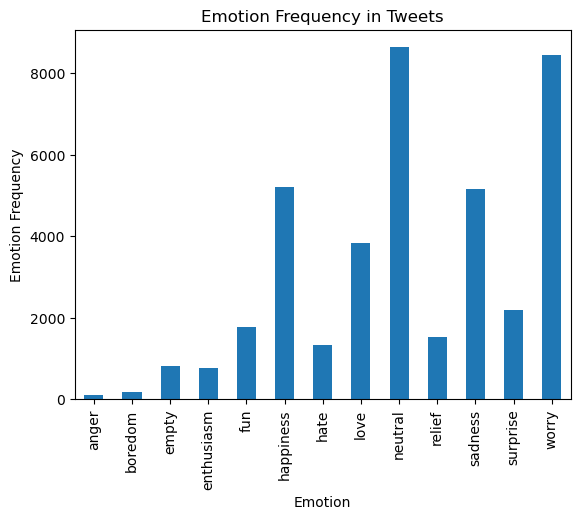

In [119]:
# Group the data by emotion type and count the number of tweets
count = tweet_emotions.groupby("sentiment").count()["content"]

# Create a bar chart
count.plot(kind="bar")

# Chart labels
plt.title("Emotion Frequency in Tweets")
plt.xlabel("Emotion")
plt.ylabel("Emotion Frequency")

Here we can see that a large portion of the emotions in the tweets are categorized into worry and neutral, and very little categorized into anger and boredom. But what is the percent distribution of these emotions?

### Pie Chart

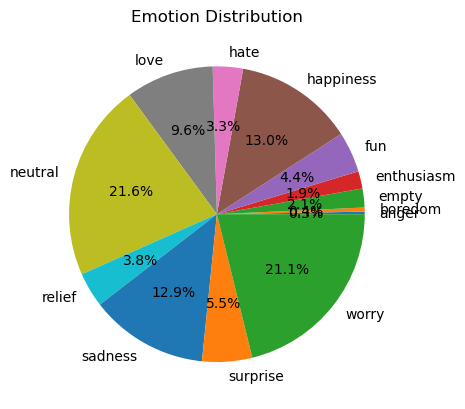

In [120]:
plt.title("Emotion Distribution")
plt.pie(count, labels=count.index, autopct="%1.1f%%")
plt.show()

According to the Pie Chart I made, neutral beats worry by .5% and although extremely hard to see it looks as though boredom beats anger by 0.1%

### Convert all the text to lower case

In [121]:
tweet_emotions["content"] = tweet_emotions["content"].str.lower()
tweet_emotions["content"]

0                                                @tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[
1                                                                                layin n bed with a headache  ughhhh...waitin on your call...
2                                                                                                         funeral ceremony...gloomy friday...
3                                                                                                        wants to hang out with friends soon!
4                                                      @dannycastillo we want to trade with someone who has houston tickets, but no one will.
                                                                         ...                                                                 
39995                                                                                                                        @johnlloydtaylor
39996 

### Remove website URLs

In [122]:
tweet_emotions["content"] = tweet_emotions["content"].apply(lambda x : re.sub('http://\S+|https://\S+', '', x))
tweet_emotions

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,sadness,layin n bed with a headache ughhhh...waitin on your call...
2,sadness,funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends soon!
4,neutral,"@dannycastillo we want to trade with someone who has houston tickets, but no one will."
...,...,...
39995,neutral,@johnlloydtaylor
39996,love,happy mothers day all my love
39997,love,"happy mother's day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!"
39998,happiness,@niariley wassup beautiful!!! follow me!! peep out my new hit singles www.myspace.com/ipsohot i def. wat u in the video!!


### Remove whitespace at the front and end of a sentence

In [123]:
tweet_emotions["content"] = tweet_emotions["content"].apply(lambda x : x.strip())
tweet_emotions

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,sadness,layin n bed with a headache ughhhh...waitin on your call...
2,sadness,funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends soon!
4,neutral,"@dannycastillo we want to trade with someone who has houston tickets, but no one will."
...,...,...
39995,neutral,@johnlloydtaylor
39996,love,happy mothers day all my love
39997,love,"happy mother's day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!"
39998,happiness,@niariley wassup beautiful!!! follow me!! peep out my new hit singles www.myspace.com/ipsohot i def. wat u in the video!!


### Remove punctuation

In [124]:
tweet_emotions["content"] = tweet_emotions["content"].apply(lambda x: x.translate (str.maketrans('', '', string.punctuation)))
tweet_emotions

,sentiment,content
0,empty,tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part
1,sadness,layin n bed with a headache ughhhhwaitin on your call
2,sadness,funeral ceremonygloomy friday
3,enthusiasm,wants to hang out with friends soon
4,neutral,dannycastillo we want to trade with someone who has houston tickets but no one will
...,...,...
39995,neutral,johnlloydtaylor
39996,love,happy mothers day all my love
39997,love,happy mothers day to all the mommies out there be you woman or man as long as youre momma to someone this is your day
39998,happiness,niariley wassup beautiful follow me peep out my new hit singles wwwmyspacecomipsohot i def wat u in the video


### Remove numbers

In [125]:
tweet_emotions["content"] = tweet_emotions["content"].apply(lambda x: x.translate (str.maketrans('', '', string.digits)))
tweet_emotions

,sentiment,content
0,empty,tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part
1,sadness,layin n bed with a headache ughhhhwaitin on your call
2,sadness,funeral ceremonygloomy friday
3,enthusiasm,wants to hang out with friends soon
4,neutral,dannycastillo we want to trade with someone who has houston tickets but no one will
...,...,...
39995,neutral,johnlloydtaylor
39996,love,happy mothers day all my love
39997,love,happy mothers day to all the mommies out there be you woman or man as long as youre momma to someone this is your day
39998,happiness,niariley wassup beautiful follow me peep out my new hit singles wwwmyspacecomipsohot i def wat u in the video


### Tokenize

In [126]:
tweet_emotions["content"] = tweet_emotions["content"].apply(word_tokenize)
tweet_emotions

,sentiment,content
0,empty,"[tiffanylue, i, know, i, was, listenin, to, bad, habit, earlier, and, i, started, freakin, at, his, part]"
1,sadness,"[layin, n, bed, with, a, headache, ughhhhwaitin, on, your, call]"
2,sadness,"[funeral, ceremonygloomy, friday]"
3,enthusiasm,"[wants, to, hang, out, with, friends, soon]"
4,neutral,"[dannycastillo, we, want, to, trade, with, someone, who, has, houston, tickets, but, no, one, will]"
...,...,...
39995,neutral,[johnlloydtaylor]
39996,love,"[happy, mothers, day, all, my, love]"
39997,love,"[happy, mothers, day, to, all, the, mommies, out, there, be, you, woman, or, man, as, long, as, youre, momma, to, someone, this, is, your, day]"
39998,happiness,"[niariley, wassup, beautiful, follow, me, peep, out, my, new, hit, singles, wwwmyspacecomipsohot, i, def, wat, u, in, the, video]"


### Remove Stopwords

In [127]:
stop_words = set(stopwords.words('english'))

tweet_emotions["content"] = tweet_emotions["content"].apply(lambda x: [word for word in x if word not in (stop_words)])
tweet_emotions

,sentiment,content
0,empty,"[tiffanylue, know, listenin, bad, habit, earlier, started, freakin, part]"
1,sadness,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,sadness,"[funeral, ceremonygloomy, friday]"
3,enthusiasm,"[wants, hang, friends, soon]"
4,neutral,"[dannycastillo, want, trade, someone, houston, tickets, one]"
...,...,...
39995,neutral,[johnlloydtaylor]
39996,love,"[happy, mothers, day, love]"
39997,love,"[happy, mothers, day, mommies, woman, man, long, youre, momma, someone, day]"
39998,happiness,"[niariley, wassup, beautiful, follow, peep, new, hit, singles, wwwmyspacecomipsohot, def, wat, u, video]"


### Lematize words

In [128]:
word_lemmatizer = WordNetLemmatizer()

tweet_emotions["content"] = tweet_emotions["content"].apply(lambda x: [word_lemmatizer.lemmatize(word) for word in x])
tweet_emotions

,sentiment,content
0,empty,"[tiffanylue, know, listenin, bad, habit, earlier, started, freakin, part]"
1,sadness,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,sadness,"[funeral, ceremonygloomy, friday]"
3,enthusiasm,"[want, hang, friend, soon]"
4,neutral,"[dannycastillo, want, trade, someone, houston, ticket, one]"
...,...,...
39995,neutral,[johnlloydtaylor]
39996,love,"[happy, mother, day, love]"
39997,love,"[happy, mother, day, mommy, woman, man, long, youre, momma, someone, day]"
39998,happiness,"[niariley, wassup, beautiful, follow, peep, new, hit, single, wwwmyspacecomipsohot, def, wat, u, video]"


### Convert list back to sentences

In [129]:
tweet_emotions["content"] = tweet_emotions["content"].apply(lambda x: ' '.join(x))
tweet_emotions

,sentiment,content
0,empty,tiffanylue know listenin bad habit earlier started freakin part
1,sadness,layin n bed headache ughhhhwaitin call
2,sadness,funeral ceremonygloomy friday
3,enthusiasm,want hang friend soon
4,neutral,dannycastillo want trade someone houston ticket one
...,...,...
39995,neutral,johnlloydtaylor
39996,love,happy mother day love
39997,love,happy mother day mommy woman man long youre momma someone day
39998,happiness,niariley wassup beautiful follow peep new hit single wwwmyspacecomipsohot def wat u video


### Word Cloud

In [130]:
text = " ".join(review for review in tweet_emotions["content"])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1951970 words in the combination of all review.


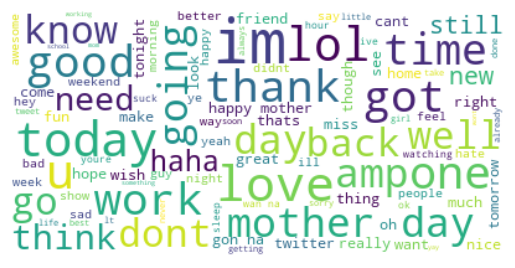

In [131]:
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Change the emotions to labels

In [132]:
# Here we will use SKLearn to encode each satisfaction label

ordinalencoder = OrdinalEncoder(categories=[["anger", "boredom", "empty", "enthusiasm", "fun", "happiness", "hate", "love", "neutral", "relief", "sadness", "surprise", "worry" ]])

tweet_emotions['sentiment'] = ordinalencoder.fit_transform(tweet_emotions[['sentiment']])

#label_map = {"anger": 0, "boredom": 1, "empty": 2, "enthusiasm": 3, "fun": 4, "happiness": 5, "hate": 6, "love": 7, "neutral": 8, "relief": 9, "sadness": 10, "surprise": 11, "worry": 12}
#tweet_emotions["senitment"] = tweet_emotions["sentiment"].astype("int")
#tweet_emotions["sentiment"] = tweet_emotions["sentiment"].map(label_map)
tweet_emotions

,sentiment,content
0,2.0,tiffanylue know listenin bad habit earlier started freakin part
1,10.0,layin n bed headache ughhhhwaitin call
2,10.0,funeral ceremonygloomy friday
3,3.0,want hang friend soon
4,8.0,dannycastillo want trade someone houston ticket one
...,...,...
39995,8.0,johnlloydtaylor
39996,7.0,happy mother day love
39997,7.0,happy mother day mommy woman man long youre momma someone day
39998,5.0,niariley wassup beautiful follow peep new hit single wwwmyspacecomipsohot def wat u video


#### Add the _ _ LABEL _ _ Prefix to the labels

In [133]:
# Concatenate __label__ with twitter['Category'] 

# label is numeric so convert to string
tweet_emotions["sentiment"] = tweet_emotions["sentiment"].astype('string')

tweet_emotions["sentiment"] = "__label__" + tweet_emotions["sentiment"]
tweet_emotions

,sentiment,content
0,__label__2.0,tiffanylue know listenin bad habit earlier started freakin part
1,__label__10.0,layin n bed headache ughhhhwaitin call
2,__label__10.0,funeral ceremonygloomy friday
3,__label__3.0,want hang friend soon
4,__label__8.0,dannycastillo want trade someone houston ticket one
...,...,...
39995,__label__8.0,johnlloydtaylor
39996,__label__7.0,happy mother day love
39997,__label__7.0,happy mother day mommy woman man long youre momma someone day
39998,__label__5.0,niariley wassup beautiful follow peep new hit single wwwmyspacecomipsohot def wat u video


#### Move sentiment to the end of the dataset

In [134]:
new_cols = ["content", "sentiment"]
tweet_emotions = tweet_emotions.reindex(columns=new_cols)
tweet_emotions

,content,sentiment
0,tiffanylue know listenin bad habit earlier started freakin part,__label__2.0
1,layin n bed headache ughhhhwaitin call,__label__10.0
2,funeral ceremonygloomy friday,__label__10.0
3,want hang friend soon,__label__3.0
4,dannycastillo want trade someone houston ticket one,__label__8.0
...,...,...
39995,johnlloydtaylor,__label__8.0
39996,happy mother day love,__label__7.0
39997,happy mother day mommy woman man long youre momma someone day,__label__7.0
39998,niariley wassup beautiful follow peep new hit single wwwmyspacecomipsohot def wat u video,__label__5.0


## Training

Supervised learning is a type of machine learning where an algorithm makes predicitons based on labeled data. The labeled data has input examples and their corresponding output labels. The goal of supervised learning is to learn a function that can map the input examples to the correct output labels, so that the algorithm can predict the output label for new and not yet seen examples.

With this dataset, I am trying to predict the emotion (output label) that is associated with a given text (input example). Since there are multiple emotions  we can associate with different texts, I am using multi-classification. In multi-classification, the goal is to predict one of several possible output labels. In this case, the model will try to predict one of 13 possible emotions.

To implement the multi-classification algorithm, I am using AWS linear learner algorithm. Linear learner is a supervised learning algorithm that is based on linear models and supports multi-classification along with many other types of algorithms. It is great for large datasets which is what we are using.

## Training the Model

In [135]:
# Shuffle and Split the data into 80% training and 20% validating

train_data, validate_data = train_test_split(tweet_emotions, test_size=0.2)

# Convert dataframes to TEXT files and save them locally to the notebook and make sure to exclude the headers so that BlazingText will accept the file

train_data.to_csv('tweet_emotions.train', sep=' ', header=False, index=False, quotechar=" ")
validate_data.to_csv('tweet_emotions.validate', sep=' ', header=False, index=False, quotechar=" ")

In [136]:
# Copy the file to your S3 bucket using sess.upload_data
# You will need to pass the file to be uploaded, a prefix (top level folder to store the data) and the subfolders
# Here we will also define the output folder for the results
# Note I did not call them .csv because the are not csv files but text files

prefix = 'twitter_emotions'
training_data_path = sess.upload_data( path='tweet_emotions.train', key_prefix=prefix + '/input/train') 
validation_data_path = sess.upload_data( path='tweet_emotions.validate', key_prefix=prefix + '/input/validate')
output_data_path = 's3://{}/{}/output'.format(bucket, prefix)
print(training_data_path)
print(validation_data_path)
print(output_data_path)

s3://sagemaker-us-east-1-006789315315/twitter_emotions/input/train/tweet_emotions.train
s3://sagemaker-us-east-1-006789315315/twitter_emotions/input/validate/tweet_emotions.validate
s3://sagemaker-us-east-1-006789315315/twitter_emotions/output


In [137]:
# Create the training container

container = image_uris.retrieve(framework='blazingtext',region=region)

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: 1.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [138]:
# Create your data channels

train_data = sagemaker.inputs.TrainingInput(
    training_data_path,
    distribution="FullyReplicated",
    content_type="text/plain",
    s3_data_type="S3Prefix",
)
validate_data = sagemaker.inputs.TrainingInput(
    validation_data_path,
    distribution="FullyReplicated",
    content_type="text/plain",
    s3_data_type="S3Prefix",
)
data_channels = {"train": train_data, "validation": validate_data}

In [139]:
# Here we are using the only required hyperameter and everything else will be set to default

bt_model = Estimator(
    container,
    role,
    instance_count=1,
    instance_type="ml.m5.large",
    volume_size=30,
    max_run=360000,
    input_mode="File",
    output_path=output_data_path,
    hyperparameters={
        "mode": "supervised"
    },
)

In [140]:
# The BlazingText Text Classification algorithm (supervised mode), also reports on a single metric during training: the validation:accuracy.

from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner

hypertuner = HyperparameterTuner(bt_model, 
                                 objective_metric_name = 'validation:accuracy',
                                 hyperparameter_ranges = {
                                 'epochs' : CategoricalParameter([1,3,5]),
                                 'min_count' : CategoricalParameter([1,3,5]),
                                 'learning_rate' : ContinuousParameter(0.01, 0.1),
                                 'batch_size': CategoricalParameter([32,64,128,256,512])},   
                                 objective_type = 'Maximize',
                                 metric_definitions = [{'Name': 'validation:accuracy', 'Regex': 'loss (\S+)'}],
                                 max_jobs=10, 
                                 max_parallel_jobs=1
                                )


In [98]:
# Start the training and tuning

hypertuner.fit(inputs=data_channels, logs=True)

INFO:sagemaker:Creating hyperparameter tuning job with name: blazingtext-230320-0052


........................................................................................................................................................................................................................................................................................................................................................................!


In [99]:
# Print out the best parameters the tuning job found

print("Best hyerparameter tuning job:{}".format(hypertuner.best_training_job()))
print("Best parameters found={}".format(hypertuner.best_estimator().hyperparameters()))

Best hyerparameter tuning job:blazingtext-230320-0052-008-73663679

2023-03-20 01:16:54 Starting - Found matching resource for reuse
2023-03-20 01:16:54 Downloading - Downloading input data
2023-03-20 01:16:54 Training - Training image download completed. Training in progress.
2023-03-20 01:16:54 Uploading - Uploading generated training model
2023-03-20 01:16:54 Completed - Resource reused by training job: blazingtext-230320-0052-009-ffcff17e
Best parameters found={'_tuning_objective_metric': 'validation:accuracy', 'batch_size': '128', 'epochs': '5', 'learning_rate': '0.09976194005137197', 'min_count': '1', 'mode': 'supervised'}


In [141]:
# Confirgure the model with the parameters that were printed

bt_model = Estimator(
    container,
    role,
    instance_count=1,
    instance_type="ml.m5.large",
    volume_size=30,
    max_run=360000,
    input_mode="File",
    output_path=output_data_path,
    hyperparameters={
        "mode": "supervised",
        "batch_size": 128,
        "epochs": 5,
        "learning_rate": 0.09976194005137197,
        "min_count": 1
    },
)

## Hyperparameter Tuning

Hyperparameter tuning is a very important step when making machine learning models.The objective is to maximize the accuracy of a model on the validation set. The validation accuracy metric is used as the tuning objective since it gives an accurate measure of the model's ability to predict new data. The hyperparameters that were tuned include the batch size, epochs, learning rate, min_count, and mode.

Batch size is number of samples processed each iteration during the training of the model. It was determined that the best value for batch size was 32.

Epochs determine the number of times the entire training dataset is passed through the model when being trained. The number of epochs is very important because if the number is too little underfitting can occur and if the number is too high overfitting can occur. The best hyperparameter that was found in this case was 5.

Learning rate controls step size taken during gradient descent optimization. The value of learning rate is important because a higher learning rate can cause the optimization to overshoot the optimal solution. A learnign rate of 0.09976194005137197 was determined to be the best.

min_count or minimum word count controls the minimum amount of times a word is required to be include in the vocabulary and it was found that min_count optimal value for our model is 1

In [145]:
# Train the model

bt_model.fit(inputs=data_channels, logs=True)

INFO:sagemaker:Creating training-job with name: blazingtext-2023-03-20-02-32-11-155


2023-03-20 02:32:11 Starting - Starting the training job...
2023-03-20 02:32:27 Starting - Preparing the instances for training......
2023-03-20 02:33:16 Downloading - Downloading input data...
2023-03-20 02:34:07 Training - Training image download completed. Training in progress..Arguments: train
[03/20/2023 02:34:11 WARNING 140173727594304] Loggers have already been setup.
[03/20/2023 02:34:11 WARNING 140173727594304] Loggers have already been setup.
[03/20/2023 02:34:11 INFO 140173727594304] nvidia-smi took: 0.025181055068969727 secs to identify 0 gpus
[03/20/2023 02:34:11 INFO 140173727594304] Running single machine CPU BlazingText training using supervised mode.
Number of CPU sockets found in instance is  1
[03/20/2023 02:34:12 INFO 140173727594304] Processing /opt/ml/input/data/train/tweet_emotions.train . File size: 2.165142059326172 MB
[03/20/2023 02:34:12 INFO 140173727594304] Processing /opt/ml/input/data/validation/tweet_emotions.validate . File size: 0.5391340255737305 MB
R

## Deployment

As of right now, the user can test reviews and sentences that they can input and see the predicted emotion related to it. The final deployed application will consist of a web-based user interface that allows Queen Street Fitness to input the URLs of local competition gym websites and output an emotion categorization of their reviews. The interface will be user friendly and simple, with a text box for entering the URL and a button to submit and start the analysis.

Once the URL is submitted the application will retrieve the reviews from the website and begin emotion detection using the model I created. The model will categorize all the reviews into different sections based on emotions. The results will be displayed on the interface, showing the percentage of reviews categorized into each emotion section. The user can then analyze the results to see and gain insights into the emotions associated with the local gym's reviews.

In [146]:
# Retrieve model data from training job

training_job_model_data = bt_model.model_data
training_job_model_data

's3://sagemaker-us-east-1-006789315315/twitter_emotions/output/blazingtext-2023-03-20-02-32-11-155/output/model.tar.gz'

In [147]:
# Create a unique model name so it won't overwrite ones taht are already there using date and time
deployed_BlazingText_model_name = "emotions-bt-model" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print("Model name is " + deployed_BlazingText_model_name)

Model name is emotion-bt-model2023-03-20-02-37-11


In [148]:
# Container Definition https://docs.aws.amazon.com/sagemaker/latest/APIReference/API_ContainerDefinition.html

client = boto3.client(service_name="sagemaker")

create_model_response = client.create_model(
    ModelName=deployed_BlazingText_model_name,
    Containers=[
        {
            "Image": container, # use the same container defined in the estimator
            "ModelDataUrl": training_job_model_data
        }
    ],
    ExecutionRoleArn=role,
)

print("Model Arn: " + create_model_response["ModelArn"])

Model Arn: arn:aws:sagemaker:us-east-1:006789315315:model/emotion-bt-model2023-03-20-02-37-11


In [149]:
twitter_epc_name = "blazingtext-serverless-epc" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())

endpoint_config_response = client.create_endpoint_config(
    EndpointConfigName=twitter_epc_name,
    ProductionVariants=[
        {
            "VariantName": "btVariant",
            "ModelName": deployed_BlazingText_model_name,
            "ServerlessConfig": {
                "MemorySizeInMB": 4096,
                "MaxConcurrency": 1,
            },
        },
    ],
)

print("Endpoint Configuration Arn: " + endpoint_config_response["EndpointConfigArn"])

Endpoint Configuration Arn: arn:aws:sagemaker:us-east-1:006789315315:endpoint-config/blazingtext-serverless-epc2023-03-20-02-37-14


In [150]:
twitter_ep_name = "emotions-serverless-ep" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())

create_endpoint_response = client.create_endpoint(
    EndpointName=twitter_ep_name,
    EndpointConfigName=twitter_epc_name,
)

print("Endpoint Arn: " + create_endpoint_response["EndpointArn"])

Endpoint Arn: arn:aws:sagemaker:us-east-1:006789315315:endpoint/emotions-serverless-ep2023-03-20-02-37-16


In [151]:
# wait for endpoint to reach a terminal state (InService) using describe endpoint

import time

describe_endpoint_response = client.describe_endpoint(EndpointName=twitter_ep_name)

while describe_endpoint_response["EndpointStatus"] == "Creating":
    describe_endpoint_response = client.describe_endpoint(EndpointName=twitter_ep_name)
    print(describe_endpoint_response["EndpointStatus"])
    time.sleep(15)

describe_endpoint_response

Creating
Creating
Creating
Creating
Creating
Creating
Creating
Creating
InService


{'EndpointName': 'emotions-serverless-ep2023-03-20-02-37-16',
 'EndpointArn': 'arn:aws:sagemaker:us-east-1:006789315315:endpoint/emotions-serverless-ep2023-03-20-02-37-16',
 'EndpointConfigName': 'blazingtext-serverless-epc2023-03-20-02-37-14',
 'ProductionVariants': [{'VariantName': 'btVariant',
   'DeployedImages': [{'SpecifiedImage': '811284229777.dkr.ecr.us-east-1.amazonaws.com/blazingtext:1',
     'ResolvedImage': '811284229777.dkr.ecr.us-east-1.amazonaws.com/blazingtext@sha256:f4a2d23762e88d6b992495a9a6384fd64f819fcbc2e143d8af222637ed6822ff',
     'ResolutionTime': datetime.datetime(2023, 3, 20, 2, 37, 16, 850000, tzinfo=tzlocal())}],
   'CurrentWeight': 1.0,
   'DesiredWeight': 1.0,
   'CurrentInstanceCount': 0,
   'CurrentServerlessConfig': {'MemorySizeInMB': 4096, 'MaxConcurrency': 1}}],
 'EndpointStatus': 'InService',
 'CreationTime': datetime.datetime(2023, 3, 20, 2, 37, 16, 335000, tzinfo=tzlocal()),
 'LastModifiedTime': datetime.datetime(2023, 3, 20, 2, 39, 4, 796000, tzin

In [152]:
# First sentence Label 0
# Second Sentence Label 2

sentences = ["Going to a funeral today... not a good day",
             "Wow! I just went to the casino and won tons of money woohoo"]        

In [153]:
runtime = boto3.Session().client('sagemaker-runtime')

payload = {"instances": sentences}

response = runtime.invoke_endpoint(
    EndpointName=twitter_ep_name,
    Body=json.dumps(payload),
    ContentType="application/json",
)

output = json.loads(response['Body'].read().decode('utf-8'))

print(output)

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


[{'label': ['__label__5.0'], 'prob': [0.1461552530527115]}, {'label': ['__label__8.0'], 'prob': [0.212656170129776]}]


### Cleanup the data

In [154]:
# Convert List to Dataframe

emotion_tweets = pd.DataFrame(sentences)
emotion_tweets.columns = ['text']
emotion_tweets = emotion_tweets.astype('string') #Make senteces lowercase

# Transform the sentences as we did with teh training data

emotion_tweets['text'] = emotion_tweets['text'].str.lower() # Make senteces lowercase

emotion_tweets['text'] = emotion_tweets['text'].apply(lambda x : re.sub('http://\S+|https://\S+', '', x)) # Remove URLs

emotion_tweets['text'] = emotion_tweets['text'].apply(lambda x : x.strip()) # Remove white space at the beginign and end

emotion_tweets['text'] = emotion_tweets['text'].apply(lambda x: x.translate (str.maketrans('', '', string.punctuation))) # Remove punctuation

emotion_tweets['text'] = emotion_tweets['text'].apply(word_tokenize) # Tokenize the sentences

emotion_tweets['text'] = emotion_tweets['text'].apply(lambda x: [word for word in x if word not in (stop_words)]) # Remove the stopwords

emotion_tweets['text'] = emotion_tweets['text'].apply(lambda x: [word_lemmatizer.lemmatize(word) for word in x])

emotion_tweets['text'] = emotion_tweets['text'].apply(lambda x: ' '.join(x))

new_sentences = emotion_tweets['text'].values.tolist()

new_sentences

['going funeral today good day', 'wow went casino ton money woohoo']

In [155]:
payload = {"instances": new_sentences}

response = runtime.invoke_endpoint(
    EndpointName=twitter_ep_name,
    Body=json.dumps(payload),
    ContentType="application/json",
)

output = json.loads(response['Body'].read().decode('utf-8'))

print(output)

[{'label': ['__label__12.0'], 'prob': [0.23335981369018555]}, {'label': ['__label__5.0'], 'prob': [0.3076927363872528]}]


In [143]:
# Delete the endpoint

client.delete_model(ModelName=deployed_BlazingText_model_name)
client.delete_endpoint_config(EndpointConfigName=twitter_epc_name)
client.delete_endpoint(EndpointName=twitter_ep_name)

ClientError: An error occurred (ValidationException) when calling the DeleteModel operation: Could not find model "arn:aws:sagemaker:us-east-1:006789315315:model/emotion-bt-model2023-03-20-02-30-23".